### 0. Setup

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import seaborn as sns
from scipy.stats import shapiro, kruskal, f_oneway


data_dir = 'data'

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)
    
%matplotlib inline

In [2]:
#import filtered feature table from phylogeny
! wget -nv -O $data_dir/feature-table_filtered.qza 'https://polybox.ethz.ch/index.php/s/YD03e961xKim9Ix/download'
! wget -nv -O $data_dir/metadata.tsv 'https://polybox.ethz.ch/index.php/s/RVPyoVYUBeVQFrJ/download'
! wget -nv -O $data_dir/taxonomy_classification.qza 'https://polybox.ethz.ch/index.php/s/xI7QZ3djVFA9xPj/download'

2022-11-29 13:11:52 URL:https://polybox.ethz.ch/index.php/s/YD03e961xKim9Ix/download [1799985/1799985] -> "data/feature-table_filtered.qza" [1]
2022-11-29 13:11:53 URL:https://polybox.ethz.ch/index.php/s/RVPyoVYUBeVQFrJ/download [325995/325995] -> "data/metadata.tsv" [1]
2022-11-29 13:11:53 URL:https://polybox.ethz.ch/index.php/s/xI7QZ3djVFA9xPj/download [397963/397963] -> "data/taxonomy_classification.qza" [1]


In [5]:
#import feature table as pandas DF
data = q2.Artifact.load(f'{data_dir}/feature-table_filtered.qza').view(pd.DataFrame)
data.head()

,042c16e5b0f6444ef0466ba21a59fbd9,872a14c755bae7615bbfd082b4de20f9,35ffcc3b809d667286737d79670b8de5,118fbd65b0c5bdc8c2f12ef7099058aa,c6c3ab4e828fb40d6e05967b7aac9338,c180a36036d60eb85ccb62737d8e2ba0,c24e0e391aa836b5eae25567c7eb89ee,46953abeca4fce8a17c5dea8732f1611,8e175abe6a746b8f33bae9cd7c8192bb,315ca0a729f126b941ba111a16d4d97a,...,36f1f089e32373134ee77626ada1fbf0,78f2730a1c1c42f71e58763c6776ac77,ae290f0b0a5586b0cb783c2dfec83fa2,0f1803505db2f19f4b3067d768adf73b,b6645d333c70257fd3fe3dd42943189c,d01af41f6dac277a3feb79a1aa713c4b,9e27b12da68a87e509022323424d7b1b,c845eda99662b5a88a8c8e979ec07dd0,16abb37658f0d89cf9462696b61b312c,5f952448dbca288581e4b199a7db9178
ERR1309715,223.0,1537.0,141.0,320.0,935.0,3534.0,178.0,0.0,1852.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR1309716,19.0,3346.0,12.0,2256.0,2288.0,974.0,1815.0,0.0,599.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR1309717,246.0,3247.0,157.0,1203.0,2181.0,1202.0,830.0,0.0,636.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR1309718,203.0,536.0,114.0,1306.0,310.0,2558.0,780.0,0.0,1245.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR1309719,301.0,1527.0,223.0,202.0,923.0,2819.0,148.0,0.0,1511.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1. Seaborn violin plot to check the distribution

Check the distribution of 20 samples, randomly picked from the original dataframe as an example.

In [7]:
n = 20

# draw n ASVs out of the original DataFrame
data_samp = data.sample(n=n, axis=1, random_state=234)

# create a new DataFrame with three columns (sample, ASV, abundance)
col_names = {'level_0': 'sample', 'level_1': 'asv', 0: 'count'}
data_plot = data_samp.stack().reset_index().rename(columns=col_names)

# make sure the shape is correct (no. of rows should be equal to the size of our random 
# sample multiplied by number of samples)
assert data_plot.shape[0] == n * data_samp.shape[0], 'The new DataFrame has an incorrect no. of rows.'

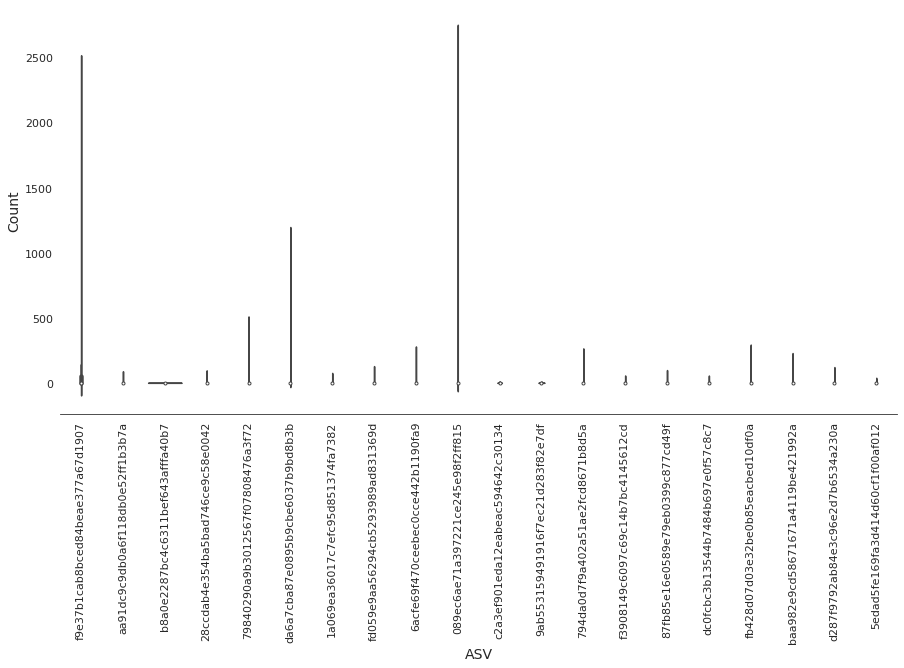

In [9]:
with sns.axes_style('white'), sns.color_palette('Set1'):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 7.5)
    
    sns.violinplot(data=data_plot, x='asv', y='count', ax=ax)
    sns.despine(left=True)
    
    # adjust tick labels and axes titles
    ax.tick_params(axis='x', rotation=90, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.set_xlabel('ASV', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

It is clearly visible that samples are not normally distributed. Use ANCOM to check differential abundance. 

### 2. ANCOM 

What we want to look at:  
- Weaning: True vs. False 
- Diet: breast feeding vs. formula diet 
- Diet: breast feeding & formula diet vs. no milk 
- Age: Months 2 vs Months 12

**Filter feature table**

In [11]:
#Filter feature table to only retain features that are present at some minimal frequency (25) and in at least 4 samples.
! qiime feature-table filter-features \
    --i-table $data_dir/feature-table_filtered.qza \
    --p-min-frequency 25 \
    --p-min-samples 4 \
    --o-filtered-table $data_dir/table_abund.qza

Saved FeatureTable[Frequency] to: data/table_abund.qza


#### 2.1 Weaning True vs. False

Differencial abundances of **species** in samples weaning = True vs. False

In [3]:
! qiime taxa collapse \
    --i-table $data_dir/table_abund.qza \
    --i-taxonomy $data_dir/taxonomy_classification.qza \
    --p-level 7 \
    --o-collapsed-table $data_dir/table_abund_l7.qza

Saved FeatureTable[Frequency] to: data/table_abund_l7.qza


In [4]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --p-where "[diet_weaning]='True' or [diet_weaning]='False'" \
    --o-filtered-table $data_dir/table_l7_weaning.qza

Saved FeatureTable[Frequency] to: data/table_l7_weaning.qza


In [5]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l7_weaning.qza \
    --o-composition-table $data_dir/table_comp_l7_weaning.qza

Saved FeatureTable[Composition] to: data/table_comp_l7_weaning.qza


In [6]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l7_weaning.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --m-metadata-column diet_weaning \
    --o-visualization $data_dir/ancom_weaning_l7.qzv

Saved Visualization to: data/ancom_weaning_l7.qzv


In [2]:
Visualization.load(f'{data_dir}/ancom_weaning_l7.qzv')

<visualization: Visualization uuid: acd96e44-3d38-493a-b5de-ad3ea502179b>

#### 2.2 Breast milk vs. formula milk

Differencial abundances of **species** in samples diet_milk = bd vs. fd

In [7]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --p-where "[diet_milk]='bd' or [diet_milk]='fd'" \
    --o-filtered-table $data_dir/table_l7_bd_fd.qza

Saved FeatureTable[Frequency] to: data/table_l7_bd_fd.qza


In [8]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l7_bd_fd.qza \
    --o-composition-table $data_dir/table_comp_l7_bd_fd.qza

Saved FeatureTable[Composition] to: data/table_comp_l7_bd_fd.qza


In [9]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l7_bd_fd.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --m-metadata-column diet_milk \
    --o-visualization $data_dir/ancom_l7_bd_fd.qzv

Saved Visualization to: data/ancom_l7_bd_fd.qzv


In [27]:
Visualization.load(f'{data_dir}/ancom_l7_bd_fd.qzv')

<visualization: Visualization uuid: 5e266297-1d79-4424-9d63-164414fdb63d>

#### 2.3 Breast & formula milk vs. no milk

**2.3.1** Differencial abundances of **species** in samples diet_milk = bd vs. no milk

In [10]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --p-where "[diet_milk]='bd' or [diet_milk]='no milk'" \
    --o-filtered-table $data_dir/table_l7_bd_nm.qza

Saved FeatureTable[Frequency] to: data/table_l7_bd_nm.qza


In [11]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l7_bd_nm.qza \
    --o-composition-table $data_dir/table_comp_l7_bd_nm.qza

Saved FeatureTable[Composition] to: data/table_comp_l7_bd_nm.qza


In [12]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l7_bd_nm.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --m-metadata-column diet_milk \
    --o-visualization $data_dir/ancom_l7_bd_nm.qzv

Saved Visualization to: data/ancom_l7_bd_nm.qzv


In [33]:
Visualization.load(f'{data_dir}/ancom_l7_bd_nm.qzv')

<visualization: Visualization uuid: efea9f97-ad3f-420e-a630-31e4511e704b>

**2.3.1** Differencial abundances of **species** in samples diet_milk = fd vs. no milk

In [13]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --p-where "[diet_milk]='fd' or [diet_milk]='no milk'" \
    --o-filtered-table $data_dir/table_l7_fd_nm.qza

Saved FeatureTable[Frequency] to: data/table_l7_fd_nm.qza


In [14]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l7_fd_nm.qza \
    --o-composition-table $data_dir/table_comp_l7_fd_nm.qza

Saved FeatureTable[Composition] to: data/table_comp_l7_fd_nm.qza


In [15]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l7_fd_nm.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --m-metadata-column diet_milk \
    --o-visualization $data_dir/ancom_l7_fd_nm.qzv

Saved Visualization to: data/ancom_l7_fd_nm.qzv


In [38]:
Visualization.load(f'{data_dir}/ancom_l7_fd_nm.qzv')

<visualization: Visualization uuid: e899142a-da9a-4a41-8d45-8dc85a22e0f7>

Only the abundance of 3 species is significantly different between fd and no milk

#### 2.4 Age comparison

Differencial abundances of **species** in samples age_months = 2.0 vs. 12

In [21]:
meta = pd.read_csv('data/metadata.tsv', sep='\t') 
meta['age_months'].replace(2.0, 'two', inplace = True)
meta['age_months'].replace(12.0, 'twelve', inplace = True)
meta.to_csv(data_dir+'/metadata_1.tsv', index = False, sep='\t')

In [16]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/metadata_1.tsv \
    --p-where "[age_months]='two' or [age_months]='twelve'" \
    --o-filtered-table $data_dir/table_l7_age.qza

Saved FeatureTable[Frequency] to: data/table_l7_age.qza


In [17]:
! qiime composition add-pseudocount \
    --i-table $data_dir/table_l7_age.qza \
    --o-composition-table $data_dir/table_comp_l7_age.qza

Saved FeatureTable[Composition] to: data/table_comp_l7_age.qza


In [23]:
! qiime composition ancom \
    --i-table $data_dir/table_comp_l7_age.qza \
    --m-metadata-file $data_dir/metadata.tsv \
    --m-metadata-column age_months \
    --o-visualization $data_dir/ancom_l7_age.qzv

Usage: qiime composition ancom [OPTIONS]

  Apply Analysis of Composition of Microbiomes (ANCOM) to identify features
  that are differentially abundant across groups.

Inputs:
  --i-table ARTIFACT FeatureTable[Composition]
                       The feature table to be used for ANCOM computation.
                                                                    [required]
Parameters:
  --m-metadata-file METADATA
  --m-metadata-column COLUMN  MetadataColumn[Categorical]
                       The categorical sample metadata column to test for
                       differential abundance across.               [required]
  --p-transform-function TEXT Choices('sqrt', 'log', 'clr')
                       The method applied to transform feature values before
                       generating volcano plots.              [default: 'clr']
  --p-difference-function TEXT Choices('mean_difference', 'f_statistic')
                       The method applied to visualize fold difference in
       

In [ ]:
Visualization.load(f'{data_dir}/ancom_l7_age.qzv')